In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
class Softmax:
    def __init__(self, eta=0.1, max_iter=100, n_categories=3, n_inputs=2):
        self.eta = eta
        self.max_iter = max_iter
        self.theta = np.random.randn(n_categories, n_inputs)
        pass
    
    def get_score(self, X):
        score = []
        for cat in self.theta:
            cat_score = []
            for row in X:
                row_score = cat.T.dot(row)
                cat_score.append(row_score)
                pass
            score.append(cat_score)
            pass
        return np.array(score).T
    
    def get_softmax(self, X):
        score = self.get_score(X)
        softmax = []
        for s in score:
            p_softmax = []
            cat_score_sum = np.sum([np.exp(cat_score) for cat_score in s], axis=0)
            for cat_score in s:
                cat_softmax = np.exp(cat_score) / cat_score_sum
                p_softmax.append(cat_softmax)
                pass
            softmax.append(p_softmax)
        return np.array(softmax)
    
    def predict(self, X):
        softmax = self.get_softmax(X)
        probas = []
        for proba in softmax:
            probas.append(np.argmax(proba))
            pass
        return np.array(probas)
    
    def fit(self, X, y):
        softmax = self.get_softmax(X)
        m = len(X)
        self.losses = []
        for epoch in range(self.max_iter):
            for i, cat_theta in enumerate(self.theta):
                gradient = 1 / m * np.sum((softmax[:,i] - y[:,i]).dot(X))
                self.theta[i] = cat_theta - self.eta * gradient
                pass
            pass
        return self

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
y = iris['target']
X = iris['data'][:, (2,3)]
one = y == 0
two = y == 1
three = y == 2
y = np.array([one,two,three]).astype(np.int).T

In [14]:
eta = 0.1
n_iter = 1000

In [244]:
clf = Softmax()

In [240]:
clf.theta

array([[-25.91841892, -23.20595897],
       [-14.21360952, -13.79264107],
       [ 36.14933517,  36.82786354]])

In [264]:
clf.fit(X, y)
clf.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [146]:
y.argmax(1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [266]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [447]:
class Bla:
    def __init__(self, eta=0.1, max_iter=100):
        self.eta = eta
        self.max_iter = max_iter
        pass

    def fit(self, theta, X, y):
        self.loss = 0
        grad = np.zeros_like(theta)
        dim, num_train = X.shape
        
        scores = theta.dot(X)
        
        scores -= np.max(scores)
        scores_exp = np.exp(scores)
        
        scores_exp_sum = np.sum(scores_exp, axis=0)
        
        scores_exp_normalized = scores_exp / scores_exp_sum
        
        scores_exp_normalized[y] -= 1 # [K, N]
        grad = scores_exp_normalized.dot(X.T)
        grad /= num_train
        grad += self.eta * theta
        
        return grad
    
    def predict(self, theta, X):
        self.loss = 0
        grad = np.zeros_like(theta)
        dim, num_train = X.shape
        
        scores = theta.dot(X)
        
        scores -= np.max(scores)
        scores_exp = np.exp(scores)
        
        scores_exp_sum = np.sum(scores_exp, axis=0)
        
        scores_exp_normalized = scores_exp / scores_exp_sum
        return np.argmax(scores_exp_normalized, axis=0)

In [ ]:
bla = Bla()
theta = np.random.rand(3,2)
for epoch in range(1000):
    theta = bla.fit(theta, X.T, y)
    print(precision_score(np.argmax(y, axis=1), bla.predict(theta, X.T), average='macro'))

In [436]:
theta

array([[ 2.97215498,  1.0155697 ],
       [-1.29015565, -0.4016979 ],
       [-1.68199934, -0.6138718 ]])

In [437]:
bla.predict(theta, X.T)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [423]:
from sklearn.metrics import precision_score, recall_score

In [432]:
np.argmax(y, axis=1).shape

(150,)

In [441]:
precision_score(np.argmax(y, axis=1), bla.predict(theta, X.T), average='macro')

0.1111111111111111

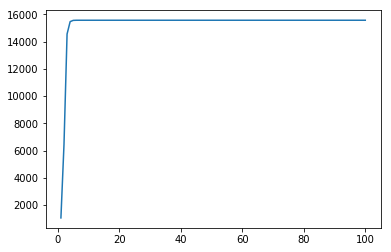

In [376]:
plt.plot(np.arange(1,100), losses)

In [358]:
bla.fit(theta, X.T, y)

(15567.241560984025, array([[-4.17629251, -1.33185124],
        [-4.17629251, -1.33185124],
        [ 4.17628872,  1.33185064]]))

In [451]:
y.shape

(150, 3)

In [657]:
class Foo:
    def foo(self, theta, X, y):
        """
        theta[3,2] -> [inputs, categories]
        X[2, 150] -> [inputs, samples]
        y[150,] -> [samples]
        """
        softmax_score = theta.dot(X)
        print(F'softmax_score: {softmax_score.shape}')
        
        softmax_score_exp = np.exp(softmax_score)
        print(F'softmax_score_exp: {softmax_score_exp.shape}')
        
        softmax_score_exp_sum = np.sum(softmax_score_exp, axis=1)
        print(F'softmax_score_exp_sum: {softmax_score_exp_sum.shape}')
        
        softmax_score_exp_normalized = softmax_score_exp.T / softmax_score_exp_sum
        print(F'softmax_score_exp_normalized: {softmax_score_exp_normalized.shape}')
        
        error = softmax_score_exp_normalized - y
        print(F'error: {error.shape}')
        
        error_dotted = []
        for category in error.T:
            error_dotted.append(category.dot(X.T))
        error_dotted = np.array(error_dotted)
        # error_dotted = error.dot(X)
        print(F'error_dotted: {error_dotted.shape}')
        
#        error_dotted_sum = np.sum(error_dotted, axis=0)
#        print(F'error_dotted_sum: {error_dotted_sum.shape}')
        
        m = len(X)
        eta = 0.1
        gradient = 1 / m * error_dotted
        print(F'gradient: {gradient.shape}')

        theta -= eta * gradient
        print(F'theta: {theta.shape}')

        return gradient

In [631]:
X = np.c_[np.ones([len(X), 1]), X]

In [632]:
X.shape

(150, 4)

In [633]:
X[:3]

array([[1. , 1. , 1.4, 0.2],
       [1. , 1. , 1.4, 0.2],
       [1. , 1. , 1.3, 0.2]])

In [658]:
Foo().foo(np.random.rand(3,2), X.T, y)

ValueError: shapes (3,2) and (4,150) not aligned: 2 (dim 1) != 4 (dim 0)

In [710]:
theta = np.random.rand(X.T.shape[0], y.shape[1])

In [711]:
theta.shape

(4, 3)

In [712]:
foo = Foo()

In [713]:
for i in range(5):
    foo.foo(theta, X.T, y)
theta

ValueError: shapes (4,3) and (4,150) not aligned: 3 (dim 1) != 4 (dim 0)

In [707]:
theta

array([[55.23719568, 55.41546023, 75.54108095, 11.34688192],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan]])